<a href="https://colab.research.google.com/github/Shruti-codes/SHALA2020/blob/master/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

n_class = 10
n_width = 28
n_height = 28
n_channel = 1

X_train = X_train.reshape((X_train.shape[0], n_height, n_width, n_channel))
X_test = X_test.reshape((X_test.shape[0], n_height, n_width, n_channel))    #Flatten
X_train , X_test = X_train.astype(np.float32) , X_test.astype(np.float32)
X_train , X_test = X_train/255.0 , X_test/255.0

X_train = np.pad(X_train, ((0,0), (2,2), (2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2),(0,0)), 'constant')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 32, 32, 1)
(60000,)
(10000, 32, 32, 1)
(10000,)


In [0]:
n_class = 10
n_width = 32
n_height = 32
n_channel = 1

from tensorflow.keras import backend, models, layers

class LeNet:
  @staticmethod
  def init(n_class, n_height, n_width, n_channel):
    inputshape = (n_height, n_width, n_channel)
    model = models.Sequential()

    model.add(layers.Conv2D(filters = 6, kernel_size =(5,5), strides = (1,1), padding = 'valid', activation = tf.nn.tanh, input_shape = inputshape))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(layers.Conv2D(filters = 16, kernel_size =(5,5), strides = (1,1), padding = 'valid', activation = tf.nn.tanh, input_shape = inputshape))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(120, activation=tf.nn.tanh))
    model.add(layers.Dense(84, activation=tf.nn.tanh))
    model.add(layers.Dense(n_class, activation=tf.nn.softmax))
    
    return model

In [3]:
model = LeNet.init(n_class, n_height, n_width, n_channel )
model.compile(optimizer= tf.keras.optimizers.SGD(0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), batch_size = 128, verbose = 1)
model.summary()

Epoch 1/10
469/469 [==============================] - 32s 69ms/step - loss: 1.1462 - accuracy: 0.7250 - val_loss: 0.5346 - val_accuracy: 0.8716
Epoch 2/10
469/469 [==============================] - 32s 69ms/step - loss: 0.4552 - accuracy: 0.8805 - val_loss: 0.3718 - val_accuracy: 0.8998
Epoch 3/10
469/469 [==============================] - 32s 69ms/step - loss: 0.3575 - accuracy: 0.9004 - val_loss: 0.3144 - val_accuracy: 0.9130
Epoch 4/10
469/469 [==============================] - 32s 69ms/step - loss: 0.3109 - accuracy: 0.9112 - val_loss: 0.2779 - val_accuracy: 0.9200
Epoch 5/10
469/469 [==============================] - 32s 68ms/step - loss: 0.2790 - accuracy: 0.9198 - val_loss: 0.2516 - val_accuracy: 0.9284
Epoch 6/10
469/469 [==============================] - 32s 69ms/step - loss: 0.2544 - accuracy: 0.9257 - val_loss: 0.2310 - val_accuracy: 0.9338
Epoch 7/10
469/469 [==============================] - 32s 69ms/step - loss: 0.2338 - accuracy: 0.9314 - val_loss: 0.2134 - val_accuracy:

<Figure size 432x288 with 0 Axes>

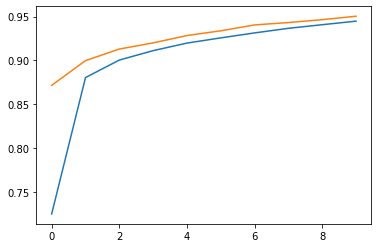

<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, acc_val)
plt.figure()

In [5]:
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=128)
print(accuracy*100)

79/79 [==============================] - 2s 29ms/step - loss: 0.1700 - accuracy: 0.9504
95.03999948501587


In [0]:
model.save_weights("LeNet5.hdf5", overwrite = True)

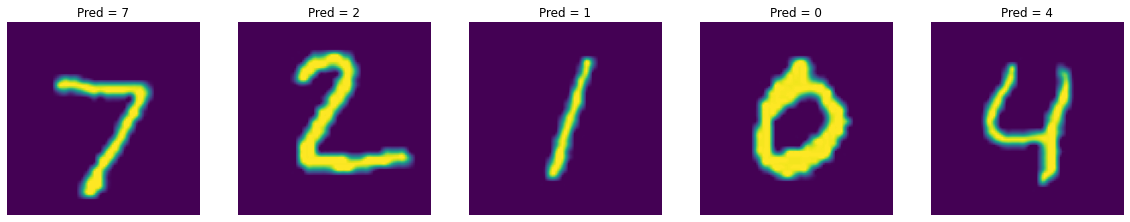

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

rows = 1
cols = 5
fig = plt.gcf()
fig.set_size_inches(cols*4, rows*4)

n = 5
test = X_test[:n]
pred = model.predict(test)

for i in range(n):
  image = (test[i] * 255).astype('uint8')
  image = cv2.resize(image, (96,96), interpolation = cv2.INTER_CUBIC)
  prediction = np.argmax(pred[i])
  if(prediction == y_test[i]):
    color = (0,255,0)
  else:
    color = (255,0,0)
  
  cv2.putText(image, str(prediction), (0,18), cv2.FONT_HERSHEY_SIMPLEX, 0.75 ,color, 1)
  
  sp = plt.subplot(rows, cols, i+1, title = 'Pred = %i' %y_test[i] )
  sp.axis('Off')
  plt.imshow(image)

plt.show()